In [ ]:
services:
    web:
        language: csharp
        project: ./src/web
        host: appservice

# Create the infrastructure as code

Azd starter generated Terraform configuration templates under `infra` folder. The unit instuctions explains how to work with Bicep files only. Because I chose  the Terraform starter template during the azd initialisation process, I need to go to Harshicorp website to find examples of deploying web app the files to follow HashiCorp Configuration Language (HCL). Terraform's Registry provides useful documentation for required and optional arguments and useful syntax. 

https://developer.hashicorp.com/terraform/tutorials/azure-get-started/azure-variables 

In the generated main.tf file, the code orchestrates the execution of other Terraform modules by passing parameters between them. I need to create two additional Terrafrom modules to define the Azure App Service for hosting application and Azure App Service Plan to manage compute resources.

## Define Azure resources for web application 
Terraform registry provides syntax for resources as: `azurerm_service_plan` and `azurerm_linux_web_app`
Instructions from Microsoft Learn seem to be out of date as the Terraform syntax for describing azure resources changed. Also, the tags are not correctly defined:
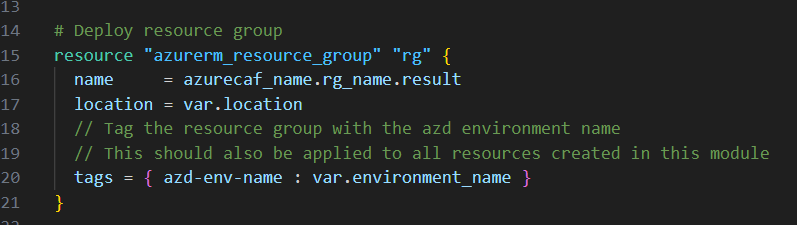 

The correct way is to use sing `=` instead of semicolon.  So I adjust the the template accordingly and proceed adding two modules in the end of the template.

In [ ]:
# ------------------------------------------------------------------------------------------------------
# Deploy app service plan
# ------------------------------------------------------------------------------------------------------

resource "azurerm_service_plan" "plan" {
  name                = var.service_plan
  location            = var.location
  resource_group_name = azurerm_resource_group.rg.name
  os_type             = "Linux"
  sku_name            = "B1"
  tags                = azurerm_resource_group.rg.tags
}


# ------------------------------------------------------------------------------------------------------
# Deploy app service web app
# ------------------------------------------------------------------------------------------------------
resource "azurerm_linux_web_app" "web" {
  name                = var.web_app
  location            = var.location
  resource_group_name = azurerm_resource_group.rg.name
  service_plan_id     = azurerm_service_plan.plan.id
  https_only          = false
  tags                = { azd-service-name = "web" }
  site_config {}
  app_settings = {}
}

Some values have red underlines because I haven't defined two additional variables in `variables.tf` file yet.

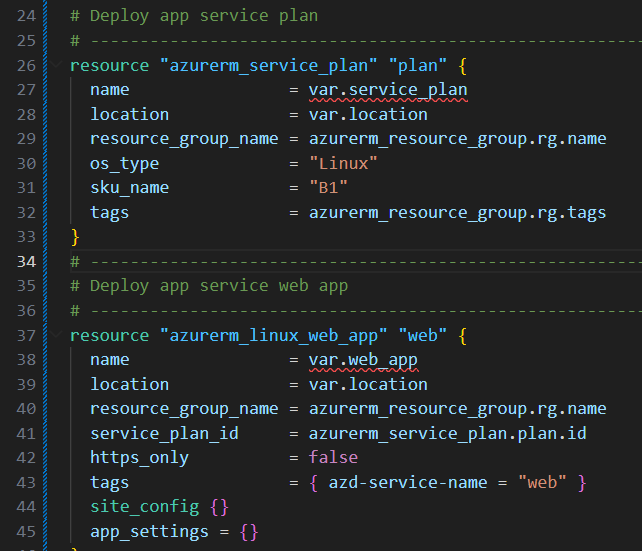

## Define variables

I follow Microsoft Learn instructions and define two additional variables that can be passed into the module to make it reusable and configurable:
- variable `service_plan` 
- variable `web_app`

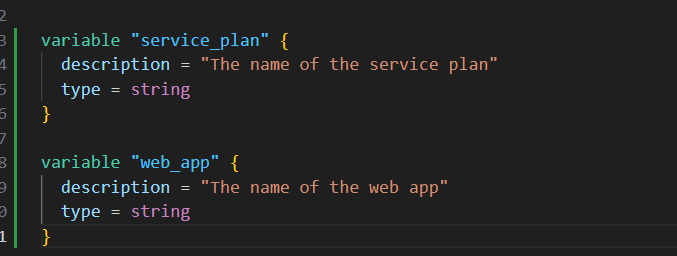


Now, I check the `main.tf` file and the red underlining is gone because variables have been defined. 

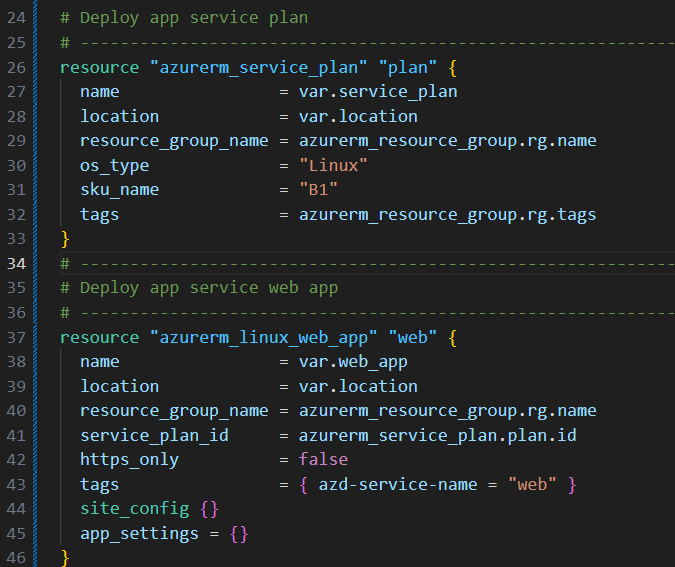